<a href="https://colab.research.google.com/github/SaniaShujaatt/Practice/blob/main/PredictiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive Maintenance

importing the required libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [227]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support as score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.utils import compute_sample_weight
from sklearn import tree
from sklearn.model_selection import cross_val_score
dtree = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeRegressor()

##Importing the dataset

In [221]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance (2).csv


##Reading the .csv file

In [223]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


##Cleaning the **dataset**

<Axes: xlabel='Count', ylabel='Failure Type'>

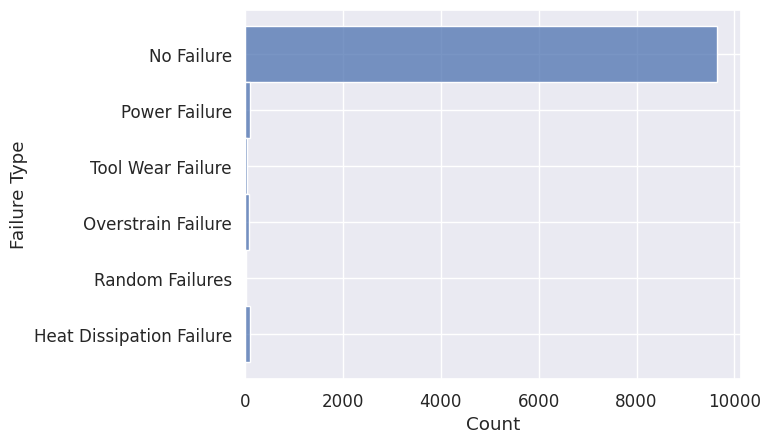

In [224]:
sns.histplot(data=df,y='Failure Type')

Drop rows with empty dataset

In [225]:
df = df.dropna(axis=0)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Assigning values to the Failure Types

In [226]:
Adf['new_column']=df['Failure Type'].replace({'No Failure': 0, 'Power Failure': 1, 'Tool Wear Failure': 2, 'Overstrain Failure': 3, 'Random Failures': 4, 'Heat Dissipation Failure': 5})
df = df.drop(['Failure Type'],axis=1)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,new_column
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0


In [219]:
print(df.dtypes)

UDI                          int64
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
new_column                   int64
dtype: object


In [168]:
X = df.drop(['new_column','Target'],axis=1)
X['Type'] = X['Type'].replace({'L': 0, 'M': 1, 'H': 2})
y=df['new_column']
X

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,1,298.1,308.6,1551,42.8,0
1,2,0,298.2,308.7,1408,46.3,3
2,3,0,298.1,308.5,1498,49.4,5
3,4,0,298.2,308.6,1433,39.5,7
4,5,0,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...
9995,9996,1,298.8,308.4,1604,29.5,14
9996,9997,2,298.9,308.4,1632,31.8,17
9997,9998,1,299.0,308.6,1645,33.4,22
9998,9999,2,299.0,308.7,1408,48.5,25


In [128]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: new_column, dtype: int64

## Visualization of relationships between variables

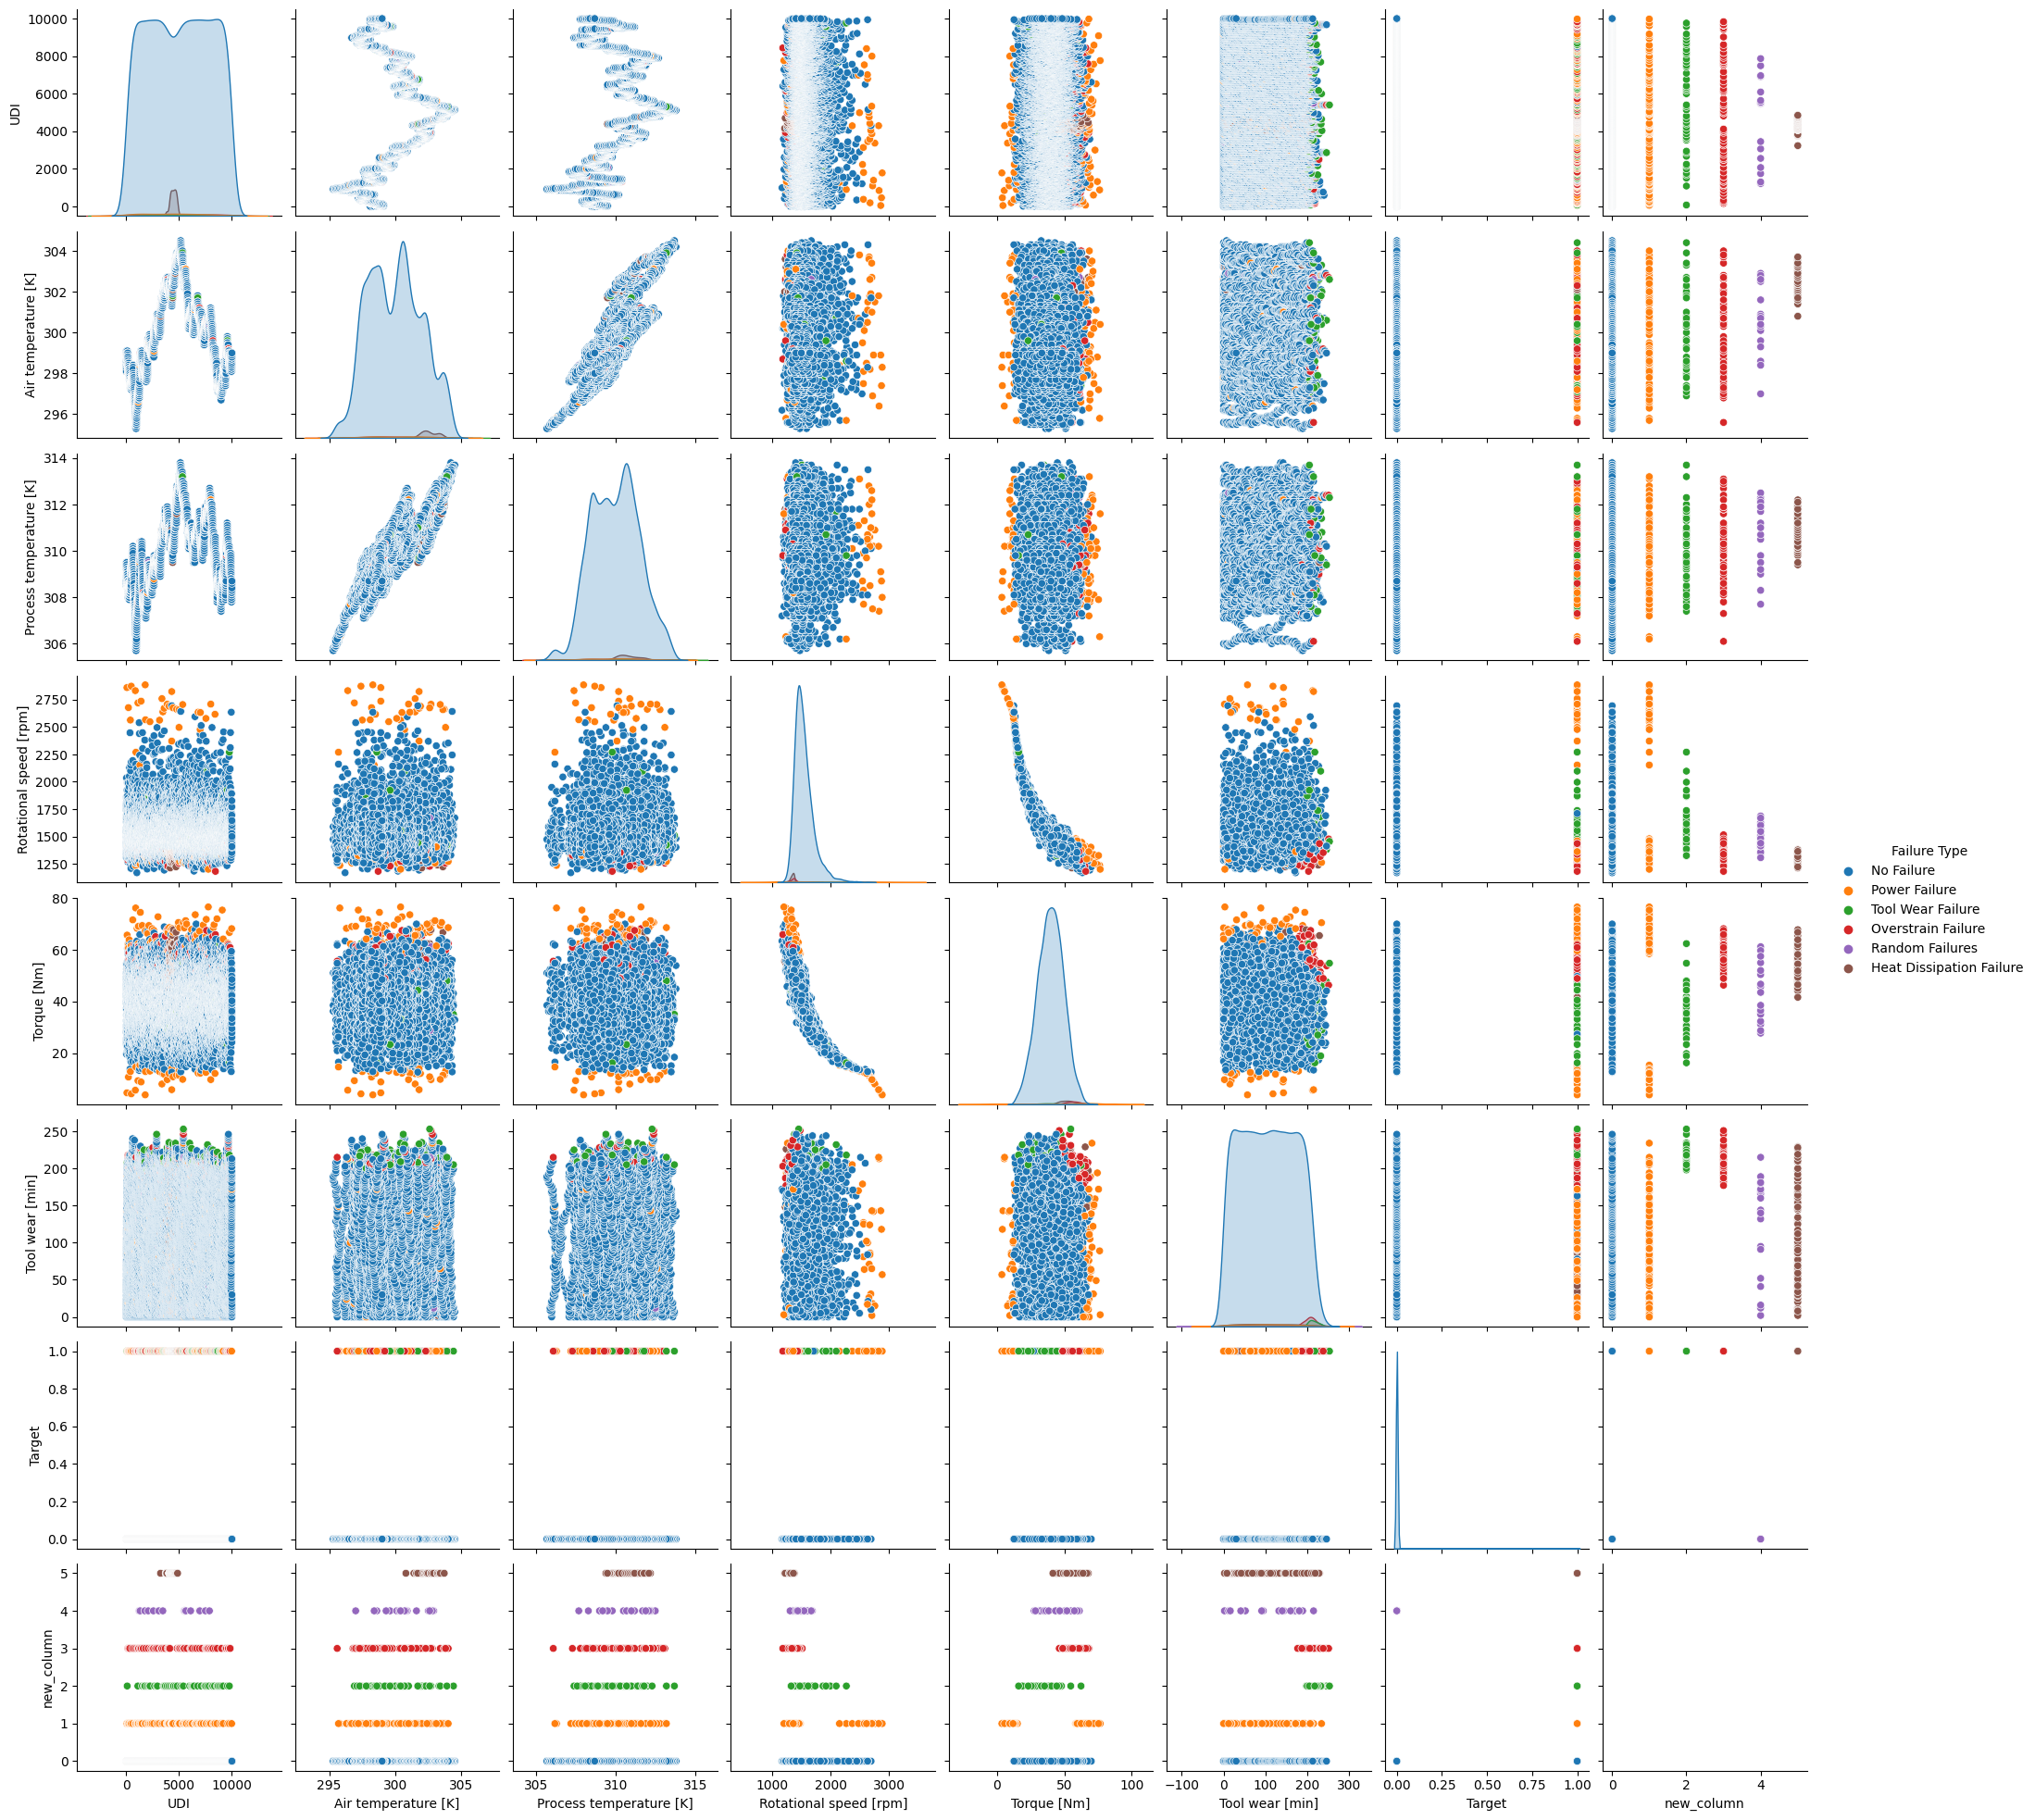

In [108]:
sns.pairplot(df, height=2.5, hue='Failure Type')

# Beginning of Training Process

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [157]:
hehe = dtree.fit(X_train,y_train)

In [214]:
from sklearn.utils import compute_sample_weight
weight_train = compute_sample_weight('balanced', y_train)
weight_train1 = compute_sample_weight('balanced', y_train)

weight_test = compute_sample_weight('balanced', y_test)

In [216]:
weight_train = weight_train[:2000]
weight_test = weight_test[2000:]
print("shape of weight_train:", weight_train.shape)



shape of weight_train: (2000,)


In [197]:
print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")


(10000, 7)
(10000,)


In [202]:
dtree.score(X_test,y_test,sample_weight=weight_train)

0.9822656297987424

In [180]:
y_pred= dtree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#Validation of the model

In [181]:
from sklearn.model_selection import cross_val_score, cross_validate

In [182]:
results = classification_report(y_test,y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1927
           1       0.76      0.89      0.82        18
           2       0.08      0.10      0.09        10
           3       0.69      0.52      0.59        21
           4       0.00      0.00      0.00         3
           5       0.80      0.95      0.87        21

    accuracy                           0.97      2000
   macro avg       0.55      0.58      0.56      2000
weighted avg       0.98      0.97      0.97      2000



## Confusion Matrix

In [183]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[1898    3   10    4    7    5]
 [   2   16    0    0    0    0]
 [   8    0    1    1    0    0]
 [   7    2    1   11    0    0]
 [   3    0    0    0    0    0]
 [   1    0    0    0    0   20]]


<Axes: xlabel='Predicted', ylabel='Actual'>

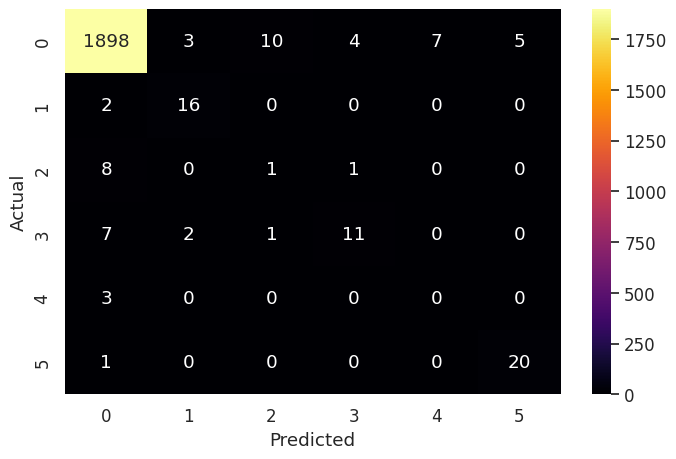

In [184]:
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.set(font_scale=1.1) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f') 

In [217]:
scores  = cross_validate(hehe, X_train, y_train, cv=10, scoring="f1_weighted")
scores_df = pd.DataFrame(scores)
px.bar(x=scores_df.index, y=scores_df.test_score, width=800)